In [86]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

def generate_dataset(size):
    x = np.arange(size)
    noice = np.random.uniform(-5,5,size)
    y = 0.4 * x + noice
    return x, y

class Perceptron:
    def __init__(self,params, epochs, learning_rate = 0.000001):
        self.params = params
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.COST = []
    
    def fit(self, X, Y):
        self.COST = []
        for _ in range(self.epochs): 
            for idx in range(len(X)):
                x = X[idx]
                y = Y[idx]
                z = self.summation(x)
                predicted_value = self.process_z(z)
                self.update_params(predicted_value, y,x)
                self.COST.append(self.cost(X, Y))
    
    def print_cost(self):
        plt.plot(self.COST)
    
    def update_params(self,predicted , actual,x):
        gradient = self.get_gradient(predicted, actual)
        self.params = self.params - self.learning_rate*gradient*x
    
    def get_gradient(self, predicted, actual):
        return np.mean((predicted - actual))
    
    def process_z(self, z):
        return z
    
    def summation(self,  x):
        z = np.dot(x,self.params)
        return z
    
    def error(self):
        pass
    
    def cost(self,x,y):
        z = self.summation(x)
        z = self.process_z(z)
        
        # MSE
        return np.mean(np.square(z - y))
        
        
    

In [78]:
import pandas as pd
data = pd.read_csv('Frogs-subsample.csv')
sp = {'HylaMinuta':0, 'HypsiboasCinerascens':1}
data = data.replace(sp)

In [79]:
x = np.array(data[['MFCCs_10', 'MFCCs_17']])
y = np.array(data['Species'])

(2,)

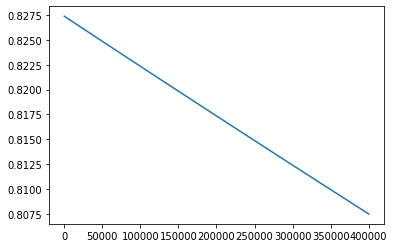

In [85]:
p = Perceptron(np.random.rand(2), 8000, 0.000001)
p.fit(x, y)
p.print_cost()

In [71]:
p.params

array([0.76010372, 0.760404  ])